In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,accuracy_score,classification_report
from scipy import stats


In [3]:
df = pd.read_csv("new_co2.csv",low_memory=False)

In [4]:
df.info

<bound method DataFrame.info of        LOCATION    Country POLLUTANT       Pollutant MEASURE  \
0           AUS  Australia       CO2  Carbon dioxide    TCO2   
1           AUS  Australia       CO2  Carbon dioxide    TCO2   
2           AUS  Australia       CO2  Carbon dioxide    TCO2   
3           AUS  Australia       CO2  Carbon dioxide    TCO2   
4           AUS  Australia       CO2  Carbon dioxide    TCO2   
...         ...        ...       ...             ...     ...   
351676      ISL    Iceland       CO2  Carbon dioxide    TCO2   
351677      GRC     Greece       CO2  Carbon dioxide    TCO2   
351678      ISL    Iceland       CO2  Carbon dioxide    TCO2   
351679      ZMB     Zambia       CO2  Carbon dioxide    TCO2   
351680      ZMB     Zambia       CO2  Carbon dioxide    TCO2   

                         Measure FLIGHT      Flight type FREQUENCY  Frequency  \
0       tonnes of CO2-equivalent  TOTAL      All flights         A     Annual   
1       tonnes of CO2-equivalent  TOT

In [5]:
df.describe

<bound method NDFrame.describe of        LOCATION    Country POLLUTANT       Pollutant MEASURE  \
0           AUS  Australia       CO2  Carbon dioxide    TCO2   
1           AUS  Australia       CO2  Carbon dioxide    TCO2   
2           AUS  Australia       CO2  Carbon dioxide    TCO2   
3           AUS  Australia       CO2  Carbon dioxide    TCO2   
4           AUS  Australia       CO2  Carbon dioxide    TCO2   
...         ...        ...       ...             ...     ...   
351676      ISL    Iceland       CO2  Carbon dioxide    TCO2   
351677      GRC     Greece       CO2  Carbon dioxide    TCO2   
351678      ISL    Iceland       CO2  Carbon dioxide    TCO2   
351679      ZMB     Zambia       CO2  Carbon dioxide    TCO2   
351680      ZMB     Zambia       CO2  Carbon dioxide    TCO2   

                         Measure FLIGHT      Flight type FREQUENCY  Frequency  \
0       tonnes of CO2-equivalent  TOTAL      All flights         A     Annual   
1       tonnes of CO2-equivalent  T

In [6]:
df.dropna(axis=1,inplace=True)

In [7]:
df.isna().sum()

LOCATION               0
Country                0
POLLUTANT              0
Pollutant              0
MEASURE                0
Measure                0
FLIGHT                 0
Flight type            0
FREQUENCY              0
Frequency              0
SOURCE                 0
Source of emissions    0
SEASONALITY            0
Seasonality            0
TIME                   0
Time                   0
Value                  0
dtype: int64

<Axes: ylabel='Value'>

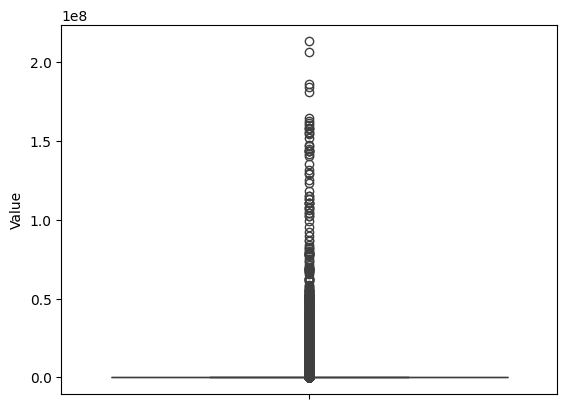

In [8]:
sns.boxplot(df['Value'])

In [9]:
z = np.abs(stats.zscore(df['Value']))
threshold_z = 0.12
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df.drop(outlier_indices)
print("Original DataFrame Shape:", df.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)


Original DataFrame Shape: (351681, 17)
DataFrame Shape after Removing Outliers: (326646, 17)


In [10]:
df.drop(['Country','POLLUTANT','Pollutant','SEASONALITY','Seasonality','MEASURE','Measure','FREQUENCY','FLIGHT','Time'],axis=1,inplace=True)

In [11]:
df

,LOCATION,Flight type,Frequency,SOURCE,Source of emissions,TIME,Value
0,AUS,All flights,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",2015,7.351698e+06
1,AUS,All flights,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",2016,7.415273e+06
2,AUS,All flights,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",2017,7.333902e+06
3,AUS,All flights,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",2018,7.320473e+06
4,AUS,All flights,Annual,RES_DOM_IN,"""(A) - Domestic flight in country A, operated ...",2019,7.756780e+06
...,...,...,...,...,...,...,...
351676,ISL,Freight flights,Quarterly,TER_DOM,Domestic aviation: (A)+(C),2023-Q3,2.465020e+00
351677,GRC,Freight flights,Quarterly,RES_INT_OUT,"""(F) - International flight outside of country...",2023-Q3,2.697590e+01
351678,ISL,Freight flights,Monthly,TER_DOM,Domestic aviation: (A)+(C),2023-08,2.465020e+00
351679,ZMB,Freight flights,Monthly,NRES_DOM_IN,"""(C) - Domestic flight in country A, operated ...",2023-07,2.025080e+02


In [12]:
# Group the data by 'Year' and sum the CO2 emissions for each year
yearly_emissions = df.groupby('TIME')['Value'].sum().reset_index()

# Sort the data by 'CO2_Emissions' in descending order to get the highest emissions on top
sorted_emissions = yearly_emissions.sort_values(by='Value', ascending=False)

# Get the top 10 years with the highest CO2 emissions
top_10_emissions = sorted_emissions.head(10)

# Display the result
print(top_10_emissions)


       TIME         Value
4      2019  7.221357e+09
3      2018  6.940145e+09
2      2017  6.587982e+09
1      2016  6.251041e+09
0      2015  5.931795e+09
55     2022  5.617476e+09
38     2021  4.388989e+09
21     2020  3.693398e+09
19  2019-Q3  1.946857e+09
18  2019-Q2  1.821282e+09


In [13]:
# Group the data by 'Year' and sum the CO2 emissions for each year
yearly_emissions = df.groupby('LOCATION')['Value'].sum().reset_index()

# Sort the data by 'CO2_Emissions' in descending order to get the highest emissions on top
sorted_emissions = yearly_emissions.sort_values(by='Value', ascending=False)

# Get the top 10 years with the highest CO2 emissions
top_10_emissions = sorted_emissions.head(10)

# Display the result
print(top_10_emissions)

    LOCATION         Value
175      USA  2.353695e+10
30       CHN  1.039902e+10
3        ARE  4.552158e+09
59       GBR  4.198387e+09
42       DEU  3.366371e+09
82       JPN  2.953104e+09
56       FRA  2.620558e+09
169      TUR  2.342505e+09
89       KOR  2.340472e+09
141      RUS  2.214596e+09


In [14]:
df['TIME'] = df['TIME'].astype(str)

In [15]:

label_encoder = LabelEncoder()
df['Frequency']= label_encoder.fit_transform(df['Frequency'])
df['LOCATION']= label_encoder.fit_transform(df['LOCATION'])
df['Flight type']= label_encoder.fit_transform(df['Flight type'])
df['Source of emissions']= label_encoder.fit_transform(df['Source of emissions'])
df['TIME']= label_encoder.fit_transform(df['TIME'])
df['SOURCE']= label_encoder.fit_transform(df['SOURCE'])

df

,LOCATION,Flight type,Frequency,SOURCE,Source of emissions,TIME,Value
0,7,0,0,4,0,0,7.351698e+06
1,7,0,0,4,0,1,7.415273e+06
2,7,0,0,4,0,2,7.333902e+06
3,7,0,0,4,0,3,7.320473e+06
4,7,0,0,4,0,4,7.756780e+06
...,...,...,...,...,...,...,...
351676,77,1,2,10,10,84,2.465020e+00
351677,65,1,2,7,5,84,2.697590e+01
351678,77,1,1,10,10,80,2.465020e+00
351679,184,1,1,0,2,79,2.025080e+02


In [16]:
top_10 = ['USA', 'CHN','ARG','GBR','DEU','JPN','FRA','TUR','KOR','RUS']
t=100

df['CHI'] = df.apply(lambda row: 1 if (row['Value']> t) or (row['Flight type'] == 1)or(row['LOCATION'] in top_10) else 0,axis=1)


In [17]:
#Normalizing

df['Value'] = df['Value'] /df['Value'].abs().max()
df

,LOCATION,Flight type,Frequency,SOURCE,Source of emissions,TIME,Value,CHI
0,7,0,0,4,0,0,3.447940e-02,1
1,7,0,0,4,0,1,3.477757e-02,1
2,7,0,0,4,0,2,3.439594e-02,1
3,7,0,0,4,0,3,3.433296e-02,1
4,7,0,0,4,0,4,3.637923e-02,1
...,...,...,...,...,...,...,...,...
351676,77,1,2,10,10,84,1.156092e-08,1
351677,65,1,2,7,5,84,1.265167e-07,1
351678,77,1,1,10,10,80,1.156092e-08,1
351679,184,1,1,0,2,79,9.497608e-07,1


In [34]:

X = df.drop('CHI', axis=1)
y = df['CHI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=50)
model.fit(X_train, y_train)



RandomForestClassifier(max_depth=50)

In [35]:
y_pred = model.predict(X_test)

In [36]:

cR = classification_report(y_test, y_pred)
print(cR)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      7073
           1       1.00      1.00      1.00     63264

    accuracy                           0.99     70337
   macro avg       0.98      0.99      0.98     70337
weighted avg       0.99      0.99      0.99     70337



In [37]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:",r2)

R-squared: 0.9385389051177471


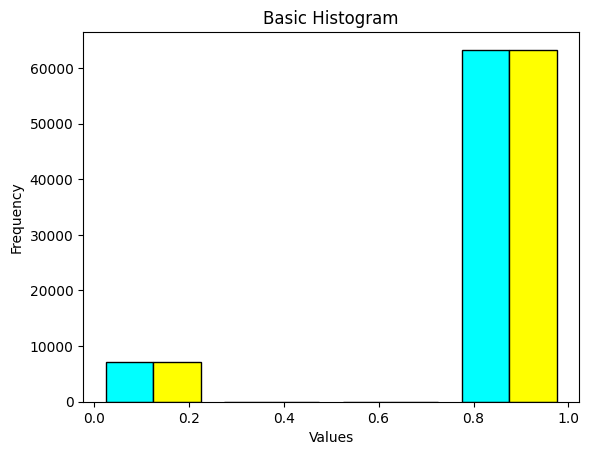

In [38]:
plt.hist([y_pred,y_test], bins=4, color=['cyan','yellow'], edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

In [39]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,LOCATION,Flight type,Frequency,SOURCE,Source of emissions,TIME,Value,CHI
LOCATION,1.000000,-0.000117,-0.000178,0.006871,0.002916,-0.003078,0.014533,-0.015070
Flight type,-0.000117,1.000000,0.000382,0.000278,0.000711,0.000298,-0.005126,-0.004716
Frequency,-0.000178,0.000382,1.000000,-0.005988,-0.005677,0.326127,-0.071411,-0.019081
SOURCE,0.006871,0.000278,-0.005988,1.000000,0.442775,-0.008105,0.040680,0.121642
Source of emissions,0.002916,0.000711,-0.005677,0.442775,1.000000,-0.009959,0.032052,0.129695
TIME,-0.003078,0.000298,0.326127,-0.008105,-0.009959,1.000000,-0.053479,-0.000282
Value,0.014533,-0.005126,-0.071411,0.040680,0.032052,-0.053479,1.000000,0.038480
CHI,-0.015070,-0.004716,-0.019081,0.121642,0.129695,-0.000282,0.038480,1.000000
